# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converts each category into a separate binary (0/1) column. |
| **Feature selection*** |Restricts regressions to just the most important variables|
| **Classifier** | A model that assigns inputs to categories (classes) instead of predicting numeric values. |
| **Precision** |TP/(TP+FP)|
| **Recall** |TP/(TP+FN)|
| **F1 Score** |2x[(precision x recall)/precision+recall)]|
| **Parsimonious model** |A model that is as simple as possible while still explaining the data|
| **Ridge regression** |Adds an L2 penalty on the coefficients to reduce overfitting, βmin​(i∑​(yi​−Xi​β)2+αj∑​βj2​)|
| **LASSO regression** |Adds an L1 penalty to improve sparsity in coefficients, βmin​(i∑​(yi​−Xi​β)2+αj∑​∣βj​∣)|
| **Cross validation** |A technique that tests a model’s performance by repeatedly training and testing it on different subsets of the data and averaging the results. |
| **Tree based methods** |Modeling techniques that split data into smaller groups by asking a series of questions about the features, making the prediction problem simpler within each group.|

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier looks like a rectangle and the area under the curve is equal to 1. 
A bad classifier looks like the line y=x and the area under the curve is equal to 0.5
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
A F1 score close to 1 means that it is an excellent classifier with high precision and high recall. When the F1 score is close to 0 this means that there is either low precision, low recall, or both, indicating it is a bad classifier. 

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** |Straight Line  | Sigmoid Curve |
| **Dependent Variable Type** |Continuous|Categorical|
| **Purpose** (regression or classification) |Regression|Classification|
| **Range of output variable** ($y_i$ or $p_i$) |$y_i$|$p_i$|
| **Method*** |Ordinary Least Squares|Maximum Likelihood Estimation|
| **Example of use** |Target variable is normally distributed, Automobile_data.csv|Target variable is not normally distributed, Palmer Penguins|  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).
Training then testing a model lets us evaluate its performance on new data instead of just memorizing the training set. We do this by splitting the data into training and testing sets. Cross-validation can improve reliability by averaging results over multiple splits.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?
Linear regression is appropriate because the dependent variable is continuous and the independent variables are numeric

In [6]:
housing <- read.csv("housing.csv")
head(housing)
str(housing)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


'data.frame':	20640 obs. of  8 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: int  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : int  880 7099 1467 1274 1627 919 2535 3104 2555 3549 ...
 $ population        : int  322 2401 496 558 565 413 1094 1157 1206 1551 ...
 $ households        : int  126 1138 177 219 259 193 514 647 595 714 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: int  452600 358500 352100 341300 342200 269700 299200 241400 226700 261100 ...


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [16]:
library(dplyr)
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_scaled <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train

head(train)

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE

#### c) Fit the model.

In [20]:
f = median_house_value ~ longitude + latitude + housing_median_age +
  total_rooms + population + households + median_income

m <- lm(f, data=housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

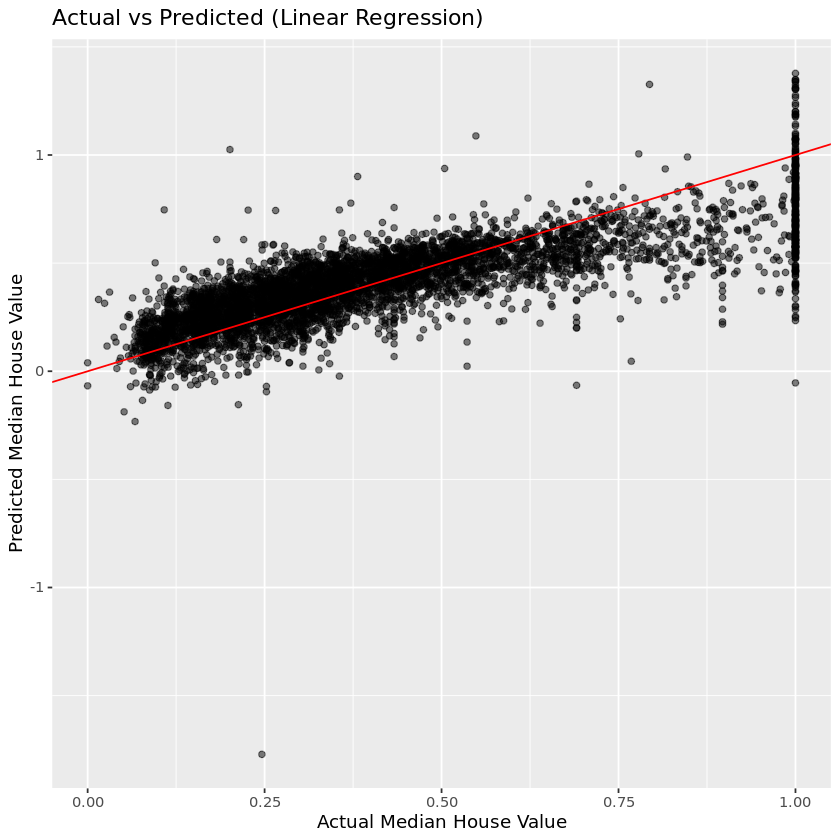

In [22]:
hs <- housing_scaled[test, ]

hs <- hs %>%
  mutate(median_house_value_pred = predict(m, newdata = hs))

ggplot(hs, aes(x = median_house_value, y = median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Actual vs Predicted (Linear Regression)",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

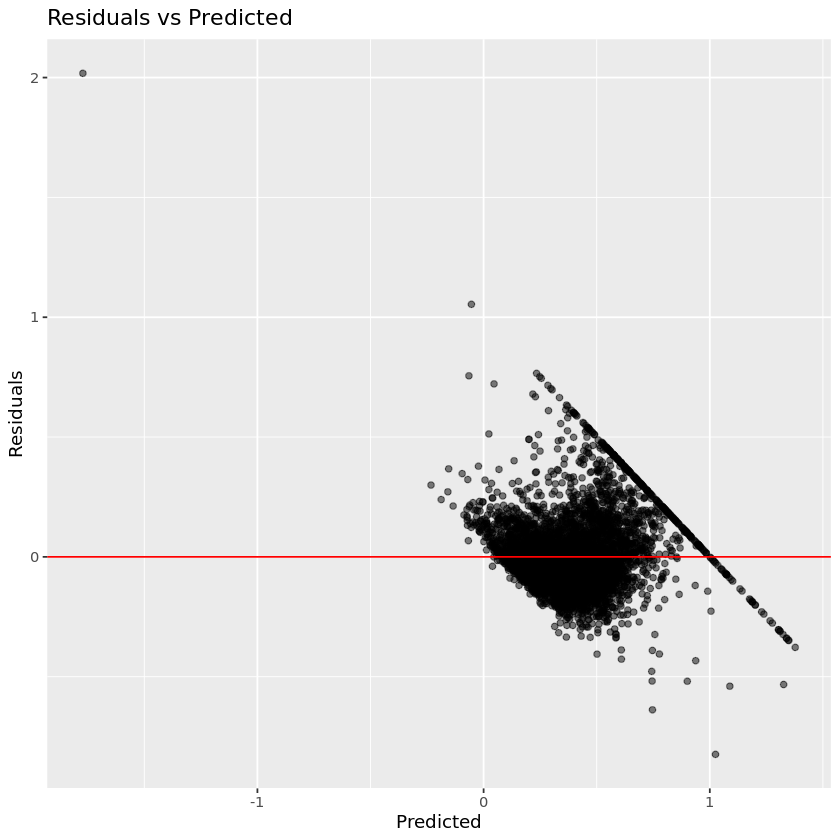

In [23]:
ggplot(hs, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs Predicted", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
The outcome variable is binary, so logistic regression is appropriate. 

In [28]:
install.packages("caret")
install.packages("glmnet")
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(glmnet))

# Load data
diabetes <- read_csv("diabetes.csv", show_col_types = FALSE)

# Summary 
summary(diabetes)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [29]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

diabetes_scaled <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(diabetes_scaled)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- diabetes_scaled %>% slice(train_idx)
d_test  <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [30]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [31]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?
The most important variables are pregnancies, glucose, and BMI. The accuracy increases with the LASSO model.

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)              -4.653919
Pregnancies               1.073443
Glucose                   3.455152
BloodPressure             .       
SkinThickness             .       
Insulin                   .       
BMI                       3.507260
DiabetesPedigreeFunction  .       
Age                       .       

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


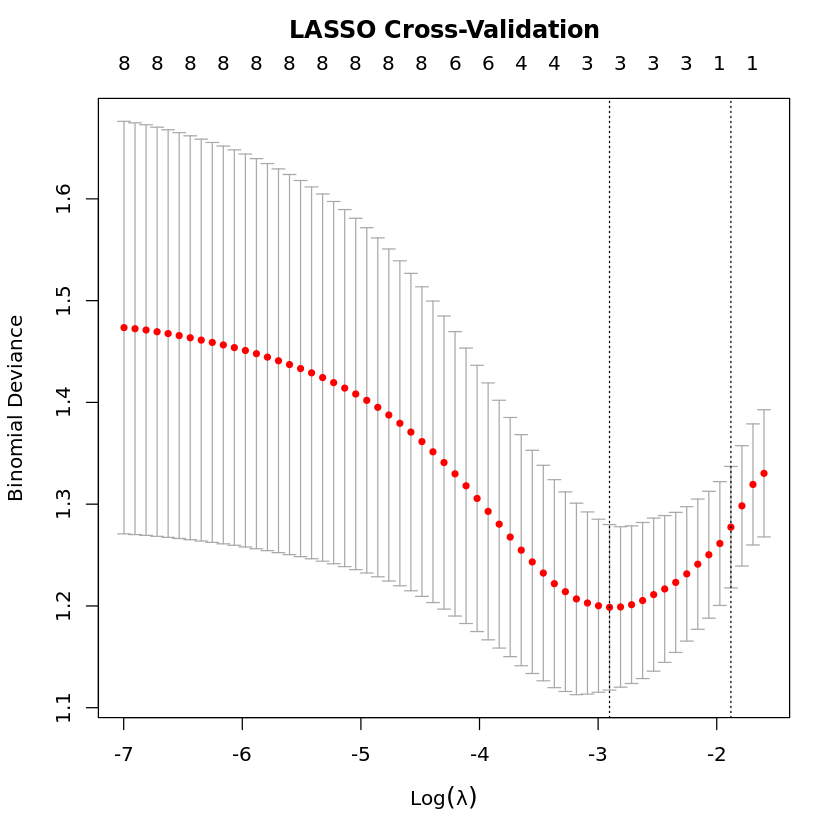

In [32]:
# Convert data frames to matrices for glmnet
X_train <- model.matrix(Outcome ~ ., d_train)[, -1]  # remove intercept
y_train <- d_train$Outcome
X_test  <- model.matrix(Outcome ~ ., d_test)[, -1]
y_test  <- d_test$Outcome

# Fit LASSO logistic regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")

# Plot cross-validation curve
plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

# Best lambda value
cv_lasso$lambda.min

# Coefficients at best lambda
coef(cv_lasso, s = "lambda.min")

# Predict on test data
lasso_pred_prob <- predict(cv_lasso, newx = X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

# Performance metrics
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


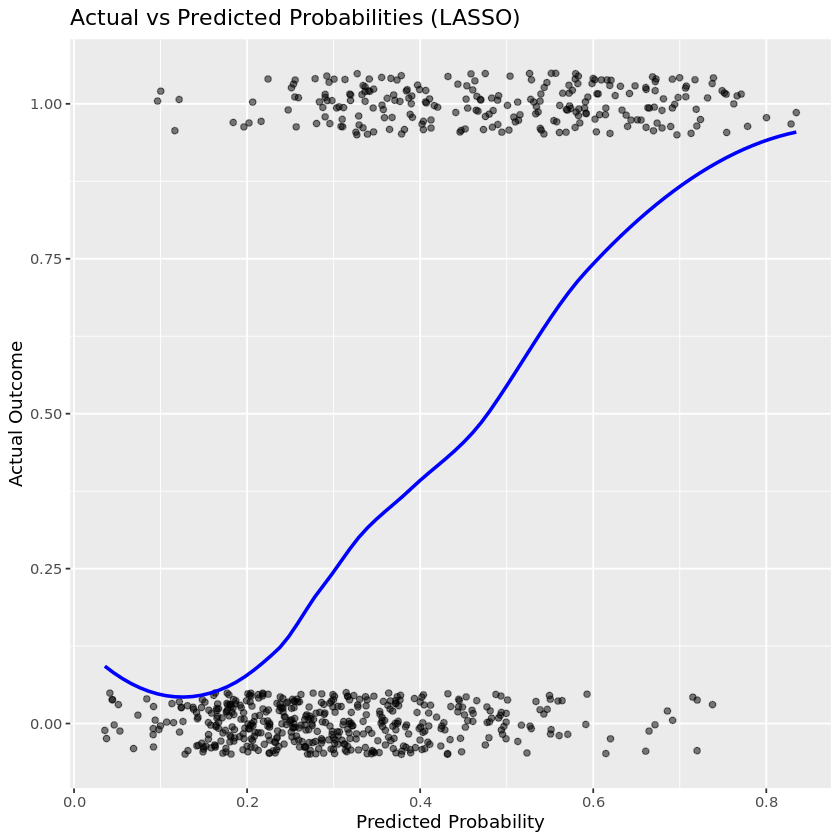

In [33]:
ggplot(data.frame(y_test, lasso_pred_prob),
       aes(x = lasso_pred_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted Probabilities (LASSO)",
       x = "Predicted Probability", y = "Actual Outcome")